<a href="https://colab.research.google.com/github/CornelioEmbedded/Self-Driving-Car/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [84]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1], [0,0]]
X, Y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)


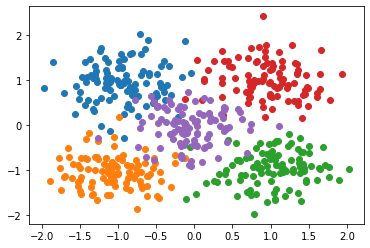

In [85]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
plt.scatter(X[Y == 2, 0], X[Y == 2, 1])
plt.scatter(X[Y == 3, 0], X[Y == 3, 1])
plt.scatter(X[Y == 4, 0], X[Y == 4, 1])

In [86]:
y_cat = to_categorical(Y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [87]:
model = Sequential()
model.add(Dense(units = 5, input_shape = (2,), activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2793 - accuracy: 0.4780
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.8440
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.9140
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.9300
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.9380
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.9420
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9460
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9420
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9400
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9460
Epoch 11/

In [89]:
def plot_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = np.argmax(model.predict(grid), axis=-1)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 1ms/step


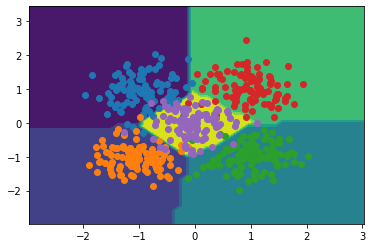

In [90]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
plt.scatter(X[Y == 2, 0], X[Y == 2, 1])
plt.scatter(X[Y == 3, 0], X[Y == 3, 1])
plt.scatter(X[Y == 4, 0], X[Y == 4, 1])

1/1 [==============================] - 0s 40ms/step
Prediction is [4]


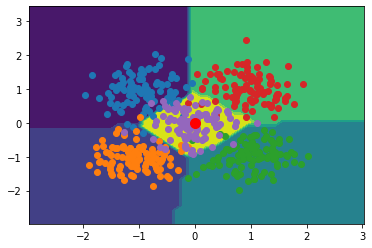

In [91]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
plt.scatter(X[Y == 2, 0], X[Y == 2, 1])
plt.scatter(X[Y == 3, 0], X[Y == 3, 1])
plt.scatter(X[Y == 4, 0], X[Y == 4, 1])
x = 0
y = 0
point = np.array([[x,y]])
prediction = np.argmax(model.predict(point), axis=-1)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'r')
print('Prediction is', prediction)